In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE

In [2]:
dataset = pd.read_csv('credit_dataset_final.csv')

In [3]:
dataset.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
numeric_vars = ['credit.duration.months', 'age', 'credit.amount']
categorical_vars = [val for val in dataset.columns.values if val not in numeric_vars]

In [5]:
for var in categorical_vars:
    dataset[var] = dataset[var].astype('category')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   credit.rating                   1000 non-null   category
 1   account.balance                 1000 non-null   category
 2   credit.duration.months          1000 non-null   int64   
 3   previous.credit.payment.status  1000 non-null   category
 4   credit.purpose                  1000 non-null   category
 5   credit.amount                   1000 non-null   int64   
 6   savings                         1000 non-null   category
 7   employment.duration             1000 non-null   category
 8   installment.rate                1000 non-null   category
 9   marital.status                  1000 non-null   category
 10  guarantor                       1000 non-null   category
 11  residence.duration              1000 non-null   category
 12  current.assets       

In [7]:
def scale(data, columns):
    for colum in columns:
        media = data[colum].mean()
        std = data[colum].std()
        data[colum] = data[colum].apply(lambda x: (x - media) / std)
    return data

In [8]:
dataset = scale(dataset, numeric_vars)

In [9]:
dataset.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,-0.240737,3,2,-0.787263,1,1,4,1,...,4,2,-1.280932,2,1,1,3,1,1,1
1,1,1,-0.987079,3,4,-0.167301,1,2,2,3,...,2,1,0.040343,2,1,2,3,2,1,1
2,1,2,-0.738298,2,4,-0.860950,2,3,2,1,...,4,1,-1.104762,2,1,1,2,1,1,1
3,1,1,-0.738298,3,4,-0.407137,1,2,3,3,...,2,1,0.304598,2,1,2,2,2,1,2
4,1,1,-0.738298,3,4,-0.389779,1,2,4,3,...,4,2,0.216513,1,2,2,2,1,1,2


In [10]:
def split(data, test=0.8):
    t_treino = int(test * len(data))
    t_test = int(len(data) - t_treino)
    
    shuffle = data.sample(frac=1)
    train_data = shuffle[:t_treino]
    test_data = shuffle[-t_test:]
    
    return train_data, test_data

In [11]:
x_train, x_test = split(dataset)

In [12]:
y_train = x_train.iloc[:, 0]
x_train = x_train.iloc[:, 1:]

In [13]:
y_test = x_test.iloc[:, 0]
x_test = x_test.iloc[:, 1:]

In [14]:
y_train.value_counts()

1    560
0    240
Name: credit.rating, dtype: int64

In [15]:
y_train.value_counts()[0] / len(y_train)

0.3

In [16]:
y_test.value_counts()

1    140
0     60
Name: credit.rating, dtype: int64

In [17]:
y_test.value_counts()[0] / len(y_test)

0.3

In [ ]:
# Classificador dummy

In [18]:
dummy_classifier = DummyClassifier(strategy='most_frequent')

In [19]:
cross_val_score(dummy_classifier, x_train, y_train, cv=5, scoring='accuracy')

array([0.7, 0.7, 0.7, 0.7, 0.7])

In [ ]:
# Regressão Logistica

In [49]:
logistic = LogisticRegression()

In [50]:
cross_val_score(logistic, x_train, y_train, cv=5, scoring='accuracy')

array([0.775  , 0.7375 , 0.74375, 0.725  , 0.78125])

In [51]:
y_train_predict = cross_val_predict(logistic, x_train, y_train, cv=5)

In [52]:
cm = confusion_matrix(y_train, y_train_predict)
cm

array([[105, 135],
       [ 63, 497]])

<AxesSubplot:>

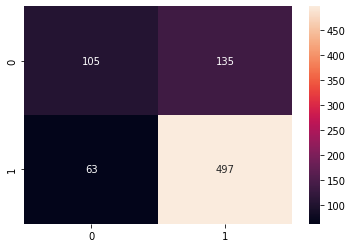

In [53]:
sns.heatmap(cm, annot=True, fmt='d')

In [54]:
print(f'Precisão: {cm[1,1] / sum(cm[:,1])}')
print(f'Revocação: {cm[1,1] / sum(cm[1,:])}')
print(f'Especificidade: {cm[0,0] / sum(cm[:,0])}')

Precisão: 0.7863924050632911
Revocação: 0.8875
Especificidade: 0.625


In [55]:
def f1_score(matrix):
    precision = matrix[1,1] / sum(matrix[:,1])
    revocacao = matrix[1,1] / sum(matrix[1,:])
    n = precision * revocacao
    d = precision + revocacao
    return (2 * (n / d))

In [56]:
f1 = f1_score(cm)
print(f'score f1: {f1}')

score f1: 0.8338926174496644


In [57]:
y_scores = cross_val_predict(logistic, x_train, y_train, cv=5, method='predict_proba')

In [58]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores[:, 1])

Text(0.5, 0, 'Falsos positivos')

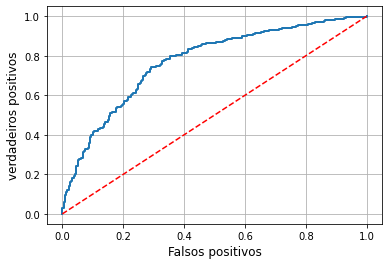

In [67]:
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], linestyle='--', color='red')
plt.grid(visible=True)
plt.ylabel('verdadeiros positivos', fontsize=12)
plt.xlabel('Falsos positivos', fontsize=12)

In [28]:
logistic.fit(x_train, y_train)

LogisticRegression()

In [29]:
logistic.coef_[0]

array([ 0.81296309, -0.28221705,  0.59055805, -0.34229701, -0.31456433,
        0.32243465,  0.10786534, -0.22182101,  0.24816476,  0.1821461 ,
       -0.06882438, -0.17547841,  0.13855775,  0.2416584 ,  0.16426284,
       -0.09255199, -0.08166186, -0.26588363,  0.28834617,  1.045259  ])

In [30]:
x_train.columns

Index(['account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose', 'credit.amount',
       'savings', 'employment.duration', 'installment.rate', 'marital.status',
       'guarantor', 'residence.duration', 'current.assets', 'age',
       'other.credits', 'apartment.type', 'bank.credits', 'occupation',
       'dependents', 'telephone', 'foreign.worker'],
      dtype='object')

In [31]:
for a, b in zip(x_train.columns, logistic.coef_[0]):
    print(f'{a} --> {b}')

account.balance --> 0.8129630863415803
credit.duration.months --> -0.28221705345175074
previous.credit.payment.status --> 0.590558049173267
credit.purpose --> -0.34229701235808946
credit.amount --> -0.31456433197514705
savings --> 0.32243465038196195
employment.duration --> 0.10786533820622855
installment.rate --> -0.22182101056498216
marital.status --> 0.24816475774334684
guarantor --> 0.18214609827750403
residence.duration --> -0.0688243834940936
current.assets --> -0.17547840603514606
age --> 0.13855774908845753
other.credits --> 0.24165840201233388
apartment.type --> 0.16426283958250318
bank.credits --> -0.09255198614470844
occupation --> -0.081661858891999
dependents --> -0.26588363023299844
telephone --> 0.28834616681373043
foreign.worker --> 1.0452589997020643


In [ ]:
# Visualizando a importância dos atributos com RFE

In [33]:
selector = RFE(logistic, n_features_to_select=1)

In [34]:
selector.fit(x_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [35]:
selector.ranking_

array([ 2,  4,  3,  6,  9,  5, 18, 11,  7, 15, 20, 14, 16,  8, 13, 17, 19,
       12, 10,  1])

In [36]:
for a, b in zip(x_train.columns, selector.ranking_):
    print(f'{a} --> {b}')

account.balance --> 2
credit.duration.months --> 4
previous.credit.payment.status --> 3
credit.purpose --> 6
credit.amount --> 9
savings --> 5
employment.duration --> 18
installment.rate --> 11
marital.status --> 7
guarantor --> 15
residence.duration --> 20
current.assets --> 14
age --> 16
other.credits --> 8
apartment.type --> 13
bank.credits --> 17
occupation --> 19
dependents --> 12
telephone --> 10
foreign.worker --> 1


In [ ]:
# Regressão Logistica com os hiperparâmetros penalty e solver alterados

In [39]:
logistic_2 = LogisticRegression(penalty='l1', solver='liblinear')

In [40]:
logistic_2.fit(x_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [44]:
logistic_2.score(x_train, y_train)

0.78

In [45]:
for a, b in zip(x_train.columns, logistic_2.coef_[0]):
    print(f'{a} --> {b}')

account.balance --> 0.785786127673845
credit.duration.months --> -0.27695301185231713
previous.credit.payment.status --> 0.5536921295858827
credit.purpose --> -0.36227011391285696
credit.amount --> -0.2891863684240039
savings --> 0.2979515657072702
employment.duration --> 0.09851180672957716
installment.rate --> -0.22565620145097018
marital.status --> 0.2411036661211109
guarantor --> 0.0
residence.duration --> -0.07741981839546351
current.assets --> -0.18229159129352895
age --> 0.16263088565116787
other.credits --> 0.11440186381592114
apartment.type --> 0.0634072184417126
bank.credits --> -0.09026754824100254
occupation --> -0.1101780199413338
dependents --> -0.2783614016725207
telephone --> 0.225497907335948
foreign.worker --> 0.6431279441077148


<AxesSubplot:>

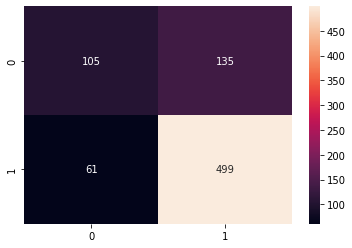

In [46]:
y_train_predict = cross_val_predict(logistic_2, x_train, y_train, cv=5)
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, annot=True, fmt='d')

In [47]:
print(f'Precisão: {cm[1,1] / sum(cm[:,1])}')
print(f'Revocação: {cm[1,1] / sum(cm[1,:])}')
print(f'Especificidade: {cm[0,0] / sum(cm[:,0])}')

Precisão: 0.7870662460567823
Revocação: 0.8910714285714286
Especificidade: 0.6325301204819277
